# Esonero 2



In [1]:
import numpy as np
import torch
import itertools
from scipy import ndimage
import skimage.transform
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
from matplotlib import image as mp_image

%matplotlib inline

# Esercizio 1 - piramidi gausiane

Data la seguente immagine, costruire la feature pyramid di gaussiane e descrivere il procedimento

![](luca-bravo-VowIFDxogG4-unsplash.jpg)

In [2]:
def generate_octave(init_level, s, sigma): 
    octave = [init_level] 
    k = 2**(1/s) 
    for _ in range(s+2): 
        next_level = ndimage.gaussian_filter(octave[-1],k * sigma)
        octave.append(next_level) 
    return octave

def generate_gaussian_pyramid(im, num_octave, s, sigma): 
    pyr = [] 
    for _ in range(num_octave): 
        octave = generate_octave(im, s, sigma) 
        pyr.append(octave) 
        im = octave[-3][::2, ::2] 
    return pyr

def plot_pyramid(p,sz,hspace=10,vspace=10):
    rows, cols = sz[0],sz[1]

    nrows = sum([x[0].shape[0] for x in p]) +  vspace*(num_octave-1)
    ncols = cols*(s+3)+hspace*(s+2)
    output_image = np.ones((nrows,ncols))

    r = 0
    for i in range(len(p)):
        c = 0
        for j in range(len(p[i])):
            w,h = p[i][j].shape
            output_image[r:r+w,c:c+h] = p[i][j]
            c += cols + hspace
        r += w + vspace
    
    return output_image


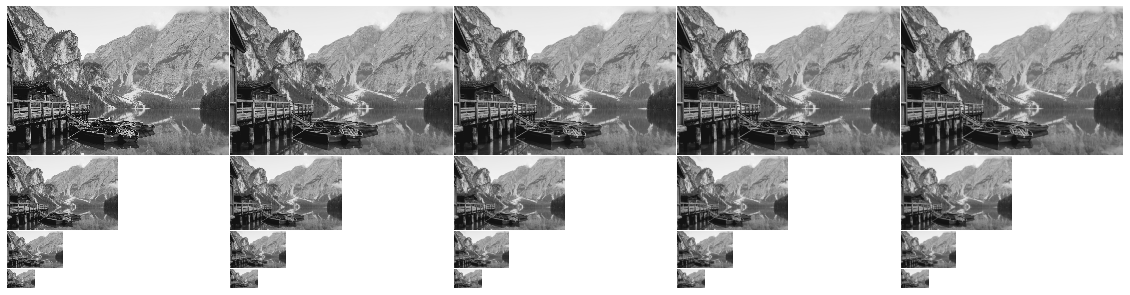

In [3]:
imageFull = mp_image.imread('luca-bravo-VowIFDxogG4-unsplash.jpg')

image = rgb2gray(imageFull)

num_octave = 4
s = 2
sigma = 1

p = generate_gaussian_pyramid(image,num_octave,s,sigma)

output_pyr = plot_pyramid(p,image.shape)

fig = plt.figure(figsize=(20, 20))

plt.imshow(output_pyr,cmap='gray')
plt.axis('off')
plt.show()

Come abbiamo visto a lezione, fissato un sigma e un fattore di scala è possibile costruire i diversi livelli della piramide applicando un filtro gaussiano con valore $\sigma$ crescente alle immagini alle differenti risoluzioni.
Lo step di incremento è legato al fattore di scala.

# Esercizio 2 - calcolo del gradiente


Data la seguente sequenza di tensori e la funzione *f*, calcolare il gradiente per i tensori a,b,c,d,e,y. 

Descrivere come viene costruito il grafo di computazione mostrando quali operazioni vengono effettuate, cioè calcolando le derivate parziali in maniera esplicita. 

*non sono necessarie librerie esterne*

$
y = f(a,b,c,d,e) = \sum \frac {a^5 + \exp(b^2) * \sin (c*d)} {3e}
$

In [4]:
a = torch.tensor([5, 6, 7, 8, 1, 2], dtype=torch.float, requires_grad=True).view(3, 2)
b = torch.tensor([3, 3, 0, 1, 6, 2], dtype=torch.float, requires_grad=True).view(3, 2)
c = torch.tensor([1, 5, 0, 7, 4, 3], dtype=torch.float, requires_grad=True).view(3, 2)
d = torch.tensor([2, 6, 3, 8, 3, 1], dtype=torch.float, requires_grad=True).view(3, 2)
e = torch.tensor([5, 2, 1, 1, 1, 1], dtype=torch.float, requires_grad=True).view(3, 2)

a.retain_grad()
b.retain_grad()
c.retain_grad()
d.retain_grad()
e.retain_grad()

x1 = a**5 + torch.exp(b**2) * torch.sin(c * d)
y = torch.sum(x1 / (3 * e))

print(f'y = {y}')

y.retain_grad()
y.backward()

print(f'dy = {y.grad}')
print(f'da = {a.grad}')
print(f'db = {b.grad}')
print(f'dc = {c.grad}')
print(f'dd = {d.grad}')
print(f'de = {e.grad}')

y = -771096685051904.0
dy = 1.0
da = tensor([[2.0833e+02, 1.0800e+03],
        [4.0017e+03, 6.8267e+03],
        [1.6667e+00, 2.6667e+01]])
db = tensor([[ 2.9472e+03, -8.0061e+03],
        [ 0.0000e+00, -9.4515e-01],
        [-9.2532e+15,  1.0273e+01]])
dc = tensor([[-4.4961e+02,  1.2499e+03],
        [ 1.0000e+00,  6.1848e+00],
        [ 3.6380e+15, -1.8017e+01]])
dd = tensor([[-2.2480e+02,  1.0416e+03],
        [ 0.0000e+00,  5.4117e+00],
        [ 4.8507e+15, -5.4052e+01]])
de = tensor([[-1.3991e+02,  1.9175e+01],
        [-5.6023e+03, -1.0922e+04],
        [ 7.7110e+14, -1.3235e+01]])


Calcolo le derivate parziali

$
\frac {\partial y} {\partial a} = \frac {5 * a^4} {3e}
$

$
\frac {\partial y} {\partial b} = \frac {2 * b * exp(b^2) * sin(c*d)} {3e}
$

$
\frac {\partial y} {\partial c} = \frac {exp(b^2) * d * cos(c*d)} {3e}
$

$
\frac {\partial y} {\partial d} = \frac {exp(b^2) * c * cos(c*d)} {3e}
$

$
\frac {\partial y} {\partial e} = \frac {a^5 + \exp(b^2) * \sin (c*d)} {3e^2}
$

In [5]:
da =  (5 * (a**4)) / (3 * e) 
db = (2 * b * torch.exp(b ** 2) * torch.sin(c * d)) / (3 * e)
dc = (torch.exp(b**2) * d * torch.cos(c*d)) / (3 * e) 
dd = (torch.exp(b**2) * c * torch.cos(c*d)) / (3 * e) 
de = (a**5 + torch.exp(b**2) * torch.sin(c*d)) / (3 * e**2) 

print(f'da = {da}')
print(f'db = {db}')
print(f'dc = {dc}')
print(f'dd = {dd}')
print(f'de = {de}')

da = tensor([[2.0833e+02, 1.0800e+03],
        [4.0017e+03, 6.8267e+03],
        [1.6667e+00, 2.6667e+01]], grad_fn=<DivBackward0>)
db = tensor([[ 2.9472e+03, -8.0061e+03],
        [ 0.0000e+00, -9.4515e-01],
        [-9.2532e+15,  1.0273e+01]], grad_fn=<DivBackward0>)
dc = tensor([[-4.4961e+02,  1.2499e+03],
        [ 1.0000e+00,  6.1848e+00],
        [ 3.6380e+15, -1.8017e+01]], grad_fn=<DivBackward0>)
dd = tensor([[-2.2480e+02,  1.0416e+03],
        [ 0.0000e+00,  5.4117e+00],
        [ 4.8507e+15, -5.4052e+01]], grad_fn=<DivBackward0>)
de = tensor([[ 1.3991e+02, -1.9175e+01],
        [ 5.6023e+03,  1.0922e+04],
        [-7.7110e+14,  1.3235e+01]], grad_fn=<DivBackward0>)


# Esercizio 3 - Batch Normalization

Dati due batch A e B, mostrare gli effetti della BN.

Suggerimento: calcolare gli istogrammi di A e B

**Soluzione**

Definizione BN:
$
y = \frac {x - E[x]} {\sqrt {VAR[x] + \epsilon}} * \gamma + \beta
$

In [6]:
# generiamo 2 batch di immagini A e B con una distribuzione normale e del rumore casuale

def generate_tensor(mean=5, var=50, dim=32, batch_size=30):
    batch = torch.zeros(batch_size, dim, dim)

    for i in range(batch_size):
        # ogni pixel è ottenuto come: 
        # random(0, 1) * x + b
        batch[i, :, :] = torch.randn(dim * dim).view(dim, dim) * torch.randint(mean, size=(1,)) + torch.randint(var, size=(1,))

    return batch


A = generate_tensor(5, 50)
B = generate_tensor(20, 150)

A.shape, B.shape

(torch.Size([30, 32, 32]), torch.Size([30, 32, 32]))

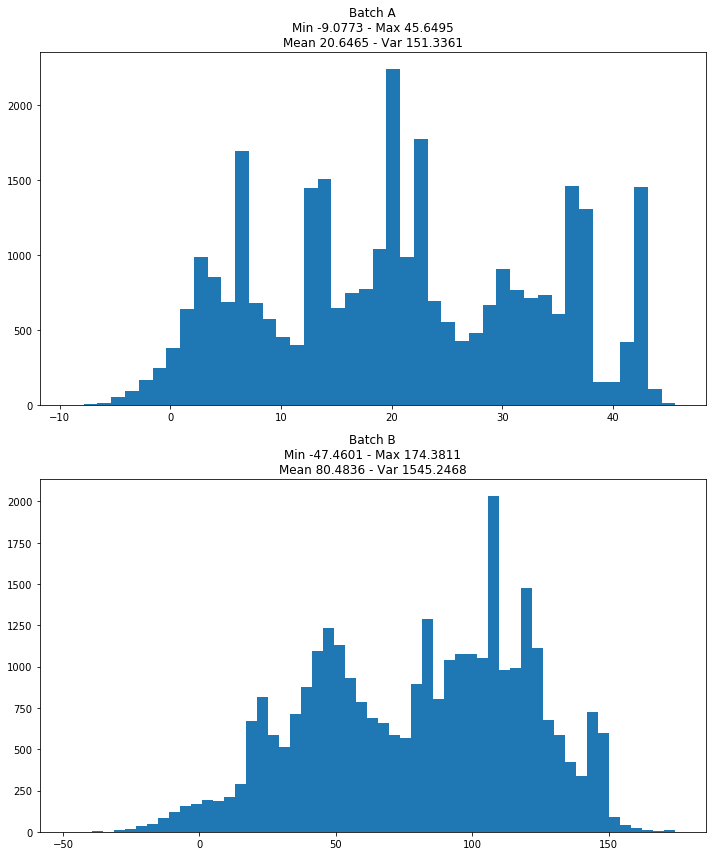

In [7]:
def describe_batch(image_bn, ax1, titleprefix='Batch'):
    
    title=f'{titleprefix}\nMin {image_bn.min():.4f} - Max {image_bn.max():.4f}' \
          f'\nMean {image_bn.mean():.4f} - Var {image_bn.var():.4f}'
    
    ax1.hist(image_bn.flatten(), bins='auto')
    ax1.set_title(title)
    
    
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))
describe_batch(A, ax1, 'Batch A')
describe_batch(B, ax2, 'Batch B')

fig.tight_layout()

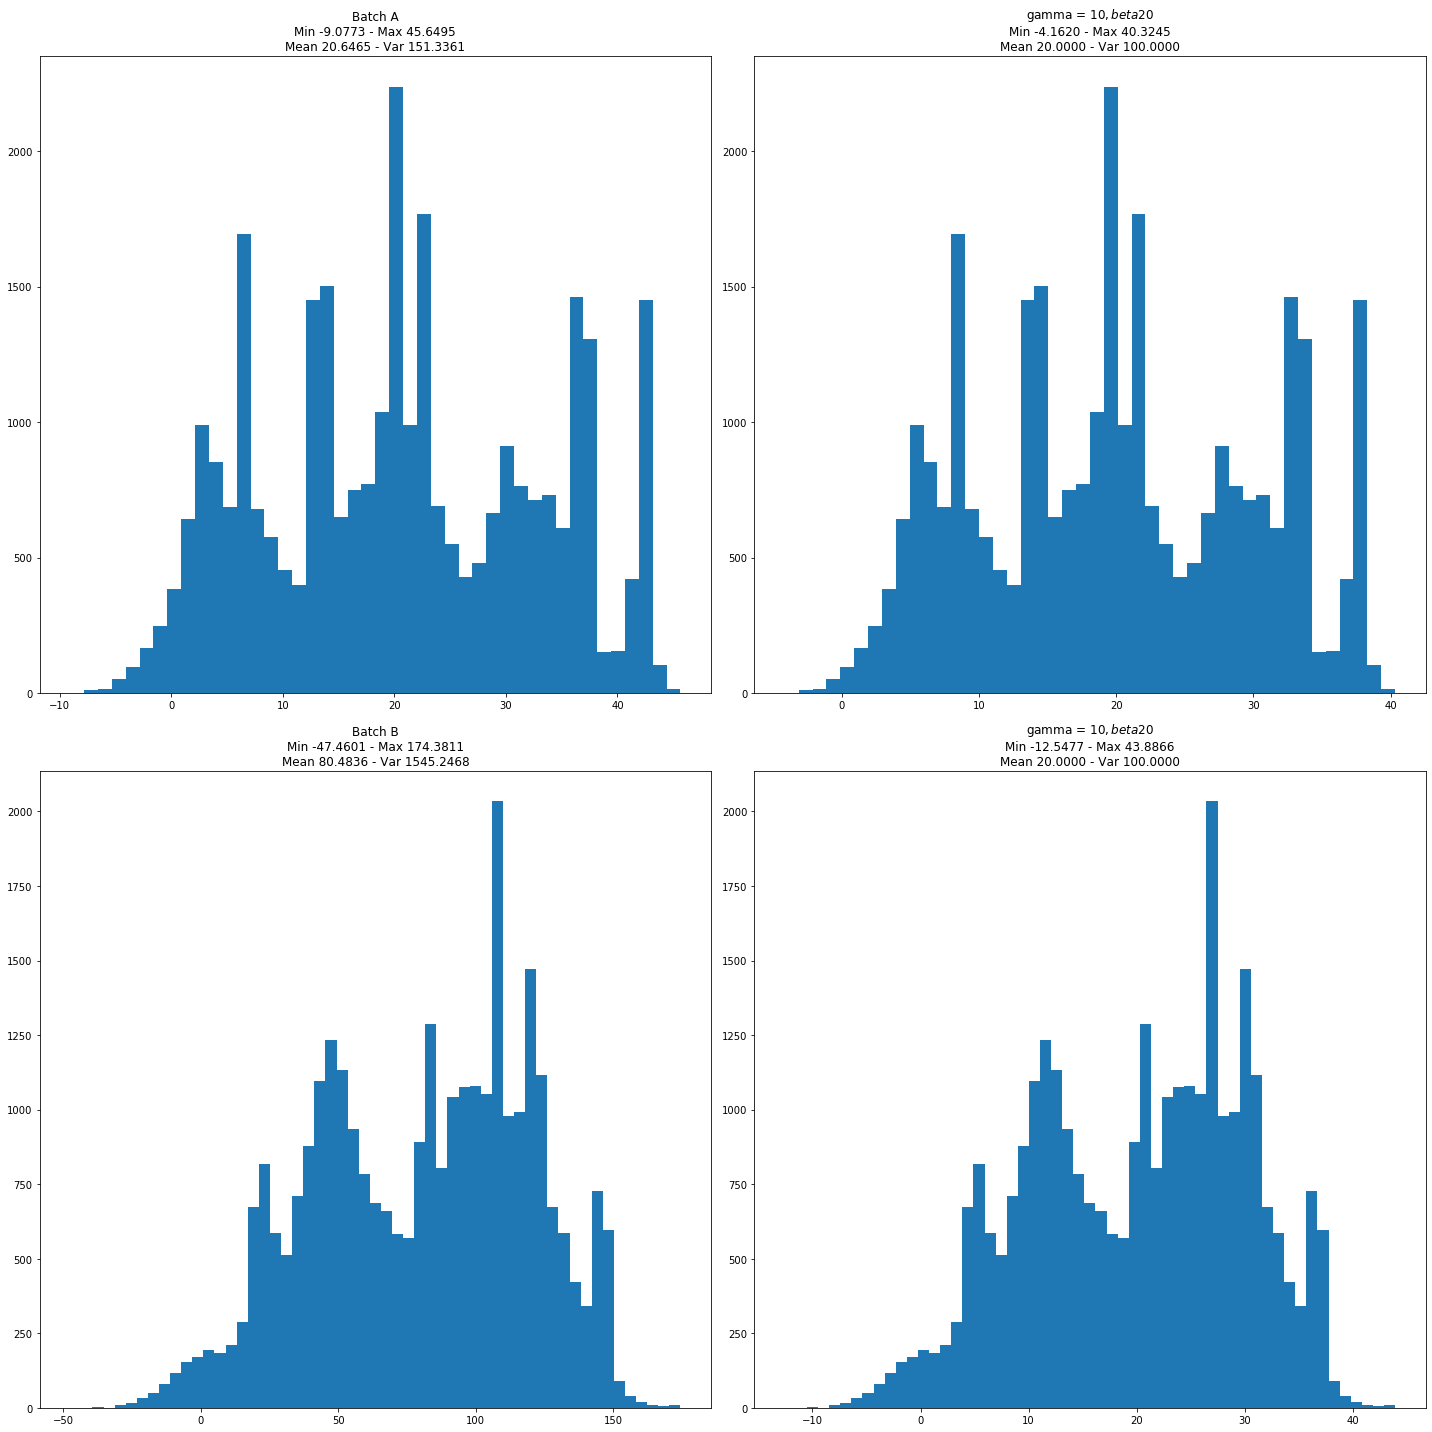

In [8]:
gamma = 10
beta = 20
eps = 1e-16

fig, axes_plot = plt.subplots(2, 2, figsize=(20, 20))

axes = axes_plot.ravel()

# A 
correctedA = gamma * (A - A.mean()) / (torch.sqrt(A.var() + eps)) + beta
describe_batch(A, axes[0], 'Batch A')
describe_batch(correctedA, axes[1], f'gamma = ${gamma}, beta ${beta}')

# B
correctedB = gamma * (B - B.mean()) / (torch.sqrt(B.var() + eps)) + beta
describe_batch(B, axes[2], 'Batch B')
describe_batch(correctedB, axes[3], f'gamma = ${gamma}, beta ${beta}')

fig.tight_layout()

I due batch in input sono costruiti con medie e varianze differenti. Il layer di BN "normalizza" i due batch in modo tale da avere media e varianza compatibili tra i due batch

# Esercizio 4 - convoluzione

Dato il seguente frammento di codice

In [9]:
conv1 = torch.nn.Conv2d(3, 10, kernel_size=3, padding=1, stride=2)
conv2 = torch.nn.Conv2d(10, 30, kernel_size=(3, 5), padding=(0, 1), stride=(3, 4))

model = lambda x: conv2(conv1(x))

Indicare giustificando la risposta qual'è il risultato per un'immagine 1x3x400x400 illustrandolo con un esempio. 

In [10]:
imageFull = mp_image.imread('luca-bravo-VowIFDxogG4-unsplash.jpg')

imageConvEx = skimage.transform.resize(imageFull, (400, 400)).astype(np.float32)

imageConvEx = torch.from_numpy(imageConvEx).permute(2,0,1).unsqueeze(0)

imageConvEx.shape

torch.Size([1, 3, 400, 400])

In [11]:
class MyModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.c1 = conv1
        self.c2 = conv2
        
    def forward(self, x):
        out1 = self.c1(x)
        out2 = self.c2(out1)
        return out1, out2

m = MyModel()    
imageConvExResult1, imageConvExResult2 = m(imageConvEx)

imageConvExResult1.shape, imageConvExResult2.shape

(torch.Size([1, 10, 200, 200]), torch.Size([1, 30, 66, 50]))

La convoluzione 1

    conv1 = torch.nn.Conv2d(3, 10, kernel_size=3, padding=1, stride=2)

applica un kernel 3x3 con stride 2. Quindi si ha una riduzione della risoluzione e la creazione di 10 FM, come conferma la shape del tensore *imageConvExResult1*.

La seconda convoluzione

    conv2 = torch.nn.Conv2d(10, 30, kernel_size=(3, 5), padding=(0, 1), stride=(3, 4))

applica una convoluzione asimmetrica 3x5 in cui sia il padding che lo stride corrispondono a operazioni che interessano maggiormente la larghezza, quindi il risultato atteso sono delle FM rettangolari con W < H.

Le immagini seguenti mostrano alcune FM per le deu convoluzioni.

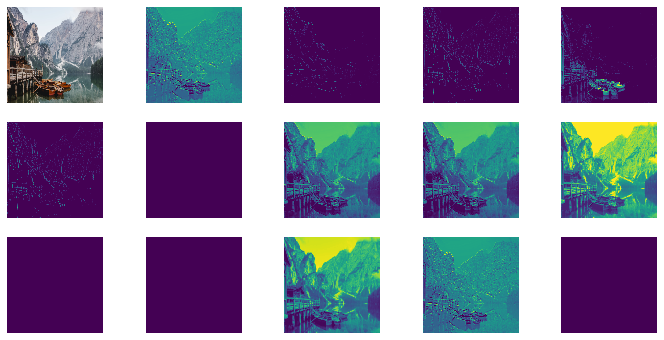

In [12]:
# OUT-1
fix, axes = plt.subplots(3, 5, figsize=(12, 6))

axes = axes.ravel()

axes[0].imshow(imageConvEx[0].permute(1,2,0).clamp(0, 1).numpy())
axes[0].axis('off')

idx = np.random.choice(list(range(imageConvExResult1.shape[1])), size=14)
for ax, i in zip(axes[1:], idx):
    img = imageConvExResult1.detach()[0, i, ...]
    ax.imshow(img.clamp(0, 1).numpy())
    ax.axis('off')

plt.show()

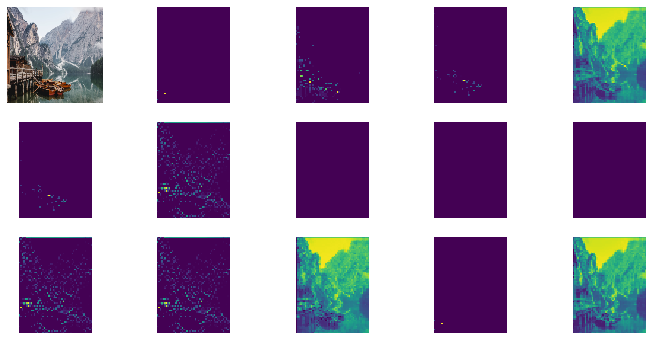

In [13]:
# OUT-2
fix, axes = plt.subplots(3, 5, figsize=(12, 6))

axes = axes.ravel()

axes[0].imshow(imageConvEx[0].permute(1,2,0).clamp(0, 1).numpy())
axes[0].axis('off')

for ax, i in zip(axes[1:], idx):
    img = imageConvExResult2.detach()[0, i, ...]
    ax.imshow(img.clamp(0, 1).numpy())
    ax.axis('off')

plt.show()

# Esercizio 5 su classificazione - VGG

Adattare/semplificare la rete VGG affinché gestisca un input di immagini 400x400

Data l'architettura della VGG, adattarla ad immagini più grandi significa modificare il calcolo delle FM. In questo caso si aggiunge un ulteriore livello convoluzionale.

![](https://upload.wikimedia.org/wikipedia/en/thumb/8/83/VGG_neural_network.png/800px-VGG_neural_network.png)

In [14]:
# utils
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

def test(net, img_size=(32, 32)):
    net.eval()
    x = torch.randn((1,3,img_size[0], img_size[1]))
    y = net(x)
    params = count_parameters(net)
    print(f"Input: {x.shape}; Output: {y.shape}; N. of params: {params:,}")

In [15]:
import torch.nn as nn
W, H = 400, 400


def conv_layer(chann_in, chann_out, k_size, p_size):
    layer = nn.Sequential(
        nn.Conv2d(chann_in, chann_out, kernel_size=k_size, padding=p_size),
        nn.BatchNorm2d(chann_out),
        nn.ReLU()
    )
    return layer

def vgg_conv_block(in_list, out_list, k_list, p_list, pooling_k, pooling_s):

    layers = [ conv_layer(in_list[i], out_list[i], k_list[i], p_list[i]) for i in range(len(in_list)) ]
    layers += [ nn.MaxPool2d(kernel_size = pooling_k, stride = pooling_s)]
    return nn.Sequential(*layers)

def vgg_fc_layer(size_in, size_out):
    layer = nn.Sequential(
        nn.Linear(size_in, size_out),
        nn.BatchNorm1d(size_out),
        nn.ReLU()
    )
    return layer

class VGG16(nn.Module):
    def __init__(self, n_classes=1000):
        super(VGG16, self).__init__()

        # Conv blocks (BatchNorm + ReLU activation added in each block)
        self.layer1 = vgg_conv_block([3,64], [64,64], [3,3], [1,1], 2, 2)
        self.layer2 = vgg_conv_block([64,128], [128,128], [3,3], [1,1], 2, 2)
        self.layer3 = vgg_conv_block([128,256,256], [256,256,256], [3,3,3], [1,1,1], 2, 2)
        self.layer4 = vgg_conv_block([256,512,512], [512,512,512], [3,3,3], [1,1,1], 2, 2)
        self.layer5 = vgg_conv_block([512,512,512], [512,512,512], [3,3,3], [1,1,1], 2, 2)
        self.layer5b = vgg_conv_block([512,512,512], [512,512,512], [3,3,3], [1,1,1], 2, 2)

        # FC layers
        #self.layer6 = vgg_fc_layer(7*7*512, 4096)
        self.layer6 = vgg_fc_layer(6*6*512, 4096)
        self.layer7 = vgg_fc_layer(4096, 4096)

        # Final layer
        self.layer8 = nn.Linear(4096, n_classes)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        vgg16_features = self.layer5(out)
        print(f'Shape VGG FF 5: {vgg16_features.shape}')
        vgg16_features = self.layer5b(vgg16_features)
        print(f'Shape VGG FF 5b: {vgg16_features.shape}')
        out = vgg16_features.view(out.size(0), -1)
        out = self.layer6(out)
        out = self.layer7(out)
        out = self.layer8(out)

        return out

vgg16 = VGG16()
test(vgg16, (W, H))

Shape VGG FF 5: torch.Size([1, 512, 12, 12])
Shape VGG FF 5b: torch.Size([1, 512, 6, 6])
Input: torch.Size([1, 3, 400, 400]); Output: torch.Size([1, 1000]); N. of params: 118,201,896


# Esercizio 5 su classificazione - AlexNet

Adattare/semplificare la rete AlexNet affinché gestisca un input di immagini 400x400

Data l'architettura della rete, aggiungere una ulteriore convoluzione permette di gestire immagini più grandi mantenendo intatta la struttura della rete e i relativi livelli di FE.

![](http://media5.datahacker.rs/2018/11/alexnet_ispravljeno-1920x877.png)

In [16]:
import torch.nn as nn
W, H = 400, 400


class LRN(nn.Module):
    def __init__(self, local_size=1, alpha=1.0, beta=0.75, ACROSS_CHANNELS=False):
        super(LRN, self).__init__()
        self.ACROSS_CHANNELS = ACROSS_CHANNELS
        if self.ACROSS_CHANNELS:
            self.average=nn.AvgPool3d(kernel_size=(local_size, 1, 1), 
                    stride=1,
                    padding=(int((local_size-1.0)/2), 0, 0)) 
        else:
            self.average=nn.AvgPool2d(kernel_size=local_size,
                    stride=1,
                    padding=int((local_size-1.0)/2))
        self.alpha = alpha
        self.beta = beta
    
    
    def forward(self, x):
        if self.ACROSS_CHANNELS:
            div = x.pow(2).unsqueeze(1)
            div = self.average(div).squeeze(1)
            div = div.mul(self.alpha).add(1.0).pow(self.beta)
        else:
            div = x.pow(2)
            div = self.average(div)
            div = div.mul(self.alpha).add(1.0).pow(self.beta)
        x = x.div(div)
        return x
    
    
class AlexNet(nn.Module):
    def __init__(self, num_classes = 1000):
        super().__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=96, kernel_size=11, stride=4),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            LRN(local_size=5, alpha=1e-4, beta=0.75, ACROSS_CHANNELS=True)
        )
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=96, out_channels=256, kernel_size=5, groups=2, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            LRN(local_size=5, alpha=1e-4, beta=0.75, ACROSS_CHANNELS=True)
        )
        
        self.layer3 = nn.Sequential(
            nn.Conv2d(in_channels=256, out_channels=384, padding=1, kernel_size=3),
            nn.ReLU(inplace=True)
        )
        self.layer4 = nn.Sequential(
            nn.Conv2d(in_channels=384, out_channels=384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True)
        )
        
        self.layer5 = nn.Sequential(
            nn.Conv2d(in_channels=384, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2)
        )
        
        self.layer5b = nn.Sequential(
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2)
        )
        
        self.layer6 = nn.Sequential(
            nn.Linear(in_features=6*6*256, out_features=4096),
            nn.ReLU(inplace=True),
            nn.Dropout()
        )
        self.layer7 = nn.Sequential(
            nn.Linear(in_features=4096, out_features=4096),
            nn.ReLU(inplace=True),
            nn.Dropout()
        )
        
        self.layer8 = nn.Linear(in_features=4096, out_features=num_classes)
        
    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.layer5(x)
        print(f'Shape layer 5: {x.shape}')
        x = self.layer5b(x)
        print(f'Shape layer 5b: {x.shape}')
        
        x = x.view(-1, 6*6*256)
        x = self.layer8(self.layer7(self.layer6(x)))
        
        return x
    

alexnet = AlexNet()
test(alexnet, (W, H))

Shape layer 5: torch.Size([1, 256, 11, 11])
Shape layer 5b: torch.Size([1, 256, 6, 6])
Input: torch.Size([1, 3, 400, 400]); Output: torch.Size([1, 1000]); N. of params: 62,661,224


# Esercizio su Object detection (1)

Data la seguente immagine, calcolare la IoU tra i due box mostrati in figura. 
Descrivere tutte le operazioni effettuate



In [17]:
import matplotlib.patches as patches

def bb_intersection_over_union(boxA, boxB):
    # determine the (x, y)-coordinates of the intersection rectangle
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])

    # compute the area of intersection rectangle
    interArea = abs(max((xB - xA, 0)) * max((yB - yA), 0))
    if interArea == 0:
        return 0
    # compute the area of both the prediction and ground-truth
    # rectangles
    boxAArea = abs((boxA[2] - boxA[0]) * (boxA[3] - boxA[1]))
    boxBArea = abs((boxB[2] - boxB[0]) * (boxB[3] - boxB[1]))

    # compute the intersection over union by taking the intersection
    # area and dividing it by the sum of prediction + ground-truth
    # areas - the interesection area
    iou = interArea / float(boxAArea + boxBArea - interArea)

    # return the intersection over union value
    return iou


def plot_bbox(image_np, bbox_list):
    fig, ax = plt.subplots(1)
    fig.set_size_inches(8, 8)

    ax.imshow(image_np)

    for bbox_idx in range(bbox_list.shape[0]):
        x1, y1, x2, y2 = bbox_list[bbox_idx, :].tolist()

        w = x2 - x1
        h = y2 - y1

        rect = patches.Rectangle((x1, y1), w, h,
                                 linewidth=1, 
                                 edgecolor='r', 
                                 facecolor='none')

        ax.add_patch(rect)

    plt.show();

IoU = 0.6073376586094046


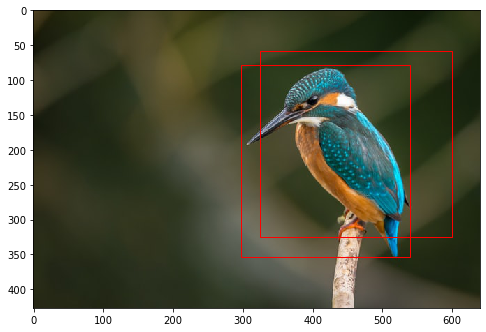

In [18]:
imageBB1 = mp_image.imread('vincent-van-zalinge-vUNQaTtZeOo-unsplash.jpg')

bb1 = [297, 79, 540, 354]
bb2 = [325, 59, 600, 325]

iou = bb_intersection_over_union(bb1, bb2)

print(f'IoU = {iou}')
plot_bbox(imageBB1, np.array([bb1, bb2]))

# Esercizio su Object detection (2)

Data la seguente immagine, costruire due Bounding box con IoU = 0.5. 
Descrivere tutte le operazioni effettuate

![](https://www.pyimagesearch.com/wp-content/uploads/2016/09/iou_equation.png)

Definiamo I l'intersezione tra le aree A, B dei due Bounding Box.

    IoU = I / (A + B - I) = 0.5

Quindi vale la seguente relazione

    3 * I = A + B

quindi si fissa l'aria di I come 

    I = wI * hI = 200 * 100 = 20000
    
    A + B = 60000

fissiamo A e B come

    A = 30000
    B = 30000

e calcoliano larghezza e altezza con w* >= wI e h* >= hI

    A = wA * hA = 200 * 150

    B = wB * hB = 250 * 120

e calcoliamo le coordinate, con un offset per traslare il riquadro, come

A:
pt1 = [0, 0] + offset 
pt2 = pt1 + [200, 150]

B:
pt3 = pt2 - [200, 100] + offset
pt4 = pt3 + [250, 120]

a = tensor([[5., 6.],
        [7., 8.],
        [1., 2.]], grad_fn=<ViewBackward>), i = 7
A = [350, 95, 550, 245]
B = [350, 145, 600, 265]
IoU = 0.5


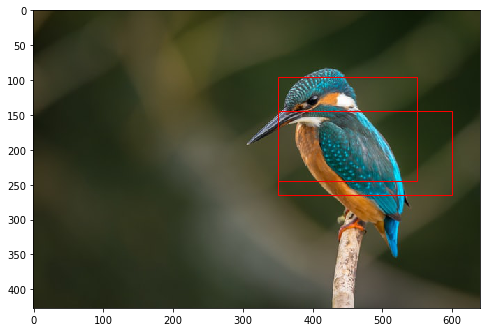

In [19]:
imageBB1 = mp_image.imread('vincent-van-zalinge-vUNQaTtZeOo-unsplash.jpg')

offset = np.array([350, 95])

wI = 200
hI = 100

pt1 = [0, 0] + offset 
pt2 = pt1 + np.array([200, 150])

pt3 = pt2 - np.array([wI, hI])
pt4 = pt3 + np.array([250, 120])

bb1 = np.concatenate((pt1, pt2)).tolist()
bb2 = np.concatenate((pt3, pt4)).tolist()

iou = bb_intersection_over_union(bb1, bb2)

print(f'a = {a}, i = {i}')
print(f'A = {bb1}')
print(f'B = {bb2}')
print(f'IoU = {iou}')
plot_bbox(imageBB1, np.array([bb1, bb2]))